Sentiment analysis is about detecting emotions, opinions of people about certain topics by analyzing their texts ( tweets, fb comments or status , youtube comments ... )

Retail industries and companies in general use sentiment analysis to get an overview of their clients' opinions on their products which enables them to make improvements and certain modifications to their products so that it meets their clients' standards ( to satisfy their clients ) 

There are a lot of social media sites like Google Plus, Facebook, and Twitter that allow expressing opinions, views, and emotions about certain topics and events.

Twitter data (also know as tweets) is a rich source of information on a large set of topics. This data can be used to find trends related to a specific keyword, measure brand sentiment or gather feedback about new products and services. This post will provide a step by step guide for text analytics on twitter data.

The steps involved in text analytics are:

Step 1: Collect tweets

Step 2: Pre-process tweets

Step 3: Apply sentiment analysis

Step 4: Apply named entity recognition

Step 5: Cluster tweets

Step 6: Visualise analysis

## Approach :

1. Extract data ( web scraping, twitter API ) + Discover it
2. Data visualization : wordclouds
3. Data cleaning : 
  * remove duplicates
  * remove emails and urls
  * remove puntuations
  * remove numbers 
  
4.  Tokenization 
5. Stemming and Lemmatization



In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from wordcloud import WordCloud, STOPWORDS



In [85]:
data=pd.read_csv('training.1600000.processed.csv',encoding='latin', 
                   names = ['target','id','date','query','user','tweet'])
data

,target,id,date,query,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best feeling ever
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me for details
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur


## Data Preprocessing

In [86]:
data = data[['target', 'tweet']]
data['tweet']=data['tweet'].str.lower()

<ipython-input-86-3befdc78ecf0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet']=data['tweet'].str.lower()


In [13]:
#check if there are missing values

missing_data = data.isna().sum().sort_values(ascending=False)
percentage_missing = round((data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100,2)
missing_info = pd.concat([missing_data,percentage_missing],keys=['Missing values','Percentage'],axis=1)
missing_info.style.background_gradient()

,Missing values,Percentage
target,0,0.000000
tweet,0,0.000000


Thankfully, there are no missing values in this dataset 

In [16]:
data['target'].unique()

array([0, 4], dtype=int64)

In [87]:
#check what each class means----------
#target = 0 : Negative
#target = 4 : Positive

pd.set_option('display.max_colwidth', -1)
data[data['target']==0]['tweet'].head
data[data['target']==4]['tweet'].head
data['target'] = data['target'].replace([0, 4],['Negative','Positive'])

<ipython-input-87-ca7ded79fd5a>:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)
<ipython-input-87-ca7ded79fd5a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace([0, 4],['Negative','Positive'])


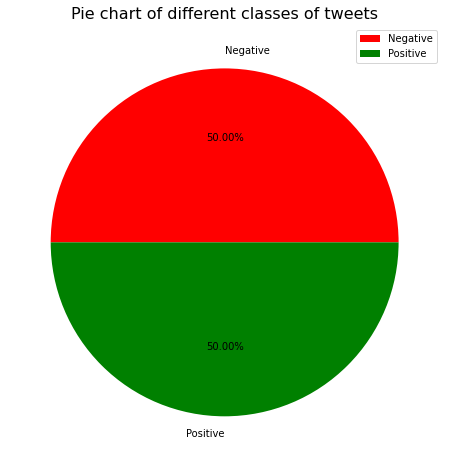

In [49]:
#check if data is balanced-------------

fig = plt.figure(figsize=(8,8))
targets = data.groupby('target').size()
targets.plot(kind='pie', subplots=True, figsize=(10, 8), autopct = "%.2f%%", colors=['red','green'])
plt.title("Pie chart of different classes of tweets",fontsize=16)
plt.ylabel("")
plt.legend()
plt.show()


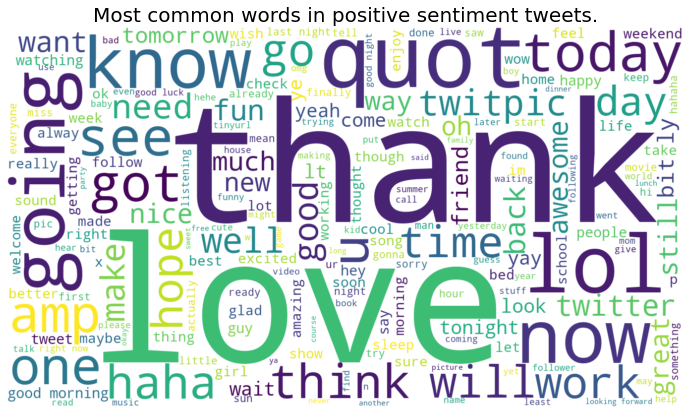

In [24]:
#wordcloud of positive tweets 

plt.figure(figsize=(14,7))
word_cloud = WordCloud(stopwords = STOPWORDS, max_words = 200, width=1366, height=768, background_color="white").generate(" ".join(data[data.target=='Positive'].tweet))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most common words in positive tweets.',fontsize=20)
plt.show()


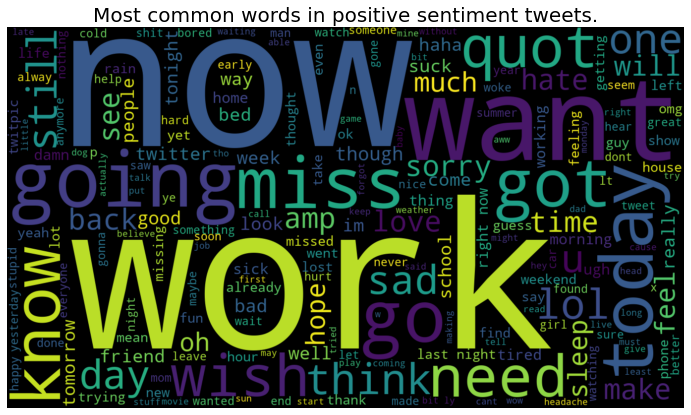

In [25]:
#wordcloud of negative tweets 

plt.figure(figsize=(14,7))
word_cloud = WordCloud(stopwords = STOPWORDS, max_words = 200, width=1366, height=768, background_color="black").generate(" ".join(data[data.target=='Negative'].tweet))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most common words in negative tweets.',fontsize=20)
plt.show()

In [88]:
#removing stopwords 

from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['tweet'] = data['tweet'].apply(lambda text: cleaning_stopwords(text))
data['tweet'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-88-499e1252e9b7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].apply(lambda text: cleaning_stopwords(text))


0    @switchfoot http://twitpic.com/2y1zl - awww, that's bummer. shoulda got david carr third day it. ;d
1    upset can't update facebook texting it... might cry result school today also. blah!                
2    @kenichan dived many times ball. managed save 50% rest go bounds                                   
3    whole body feels itchy like fire                                                                   
4    @nationwideclass no, behaving all. i'm mad. here? can't see there.                                 
Name: tweet, dtype: object

In [89]:
# removing punctuation -----------
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def remove_puncts(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

data['tweet']= data['tweet'].apply(lambda x: remove_puncts(x))
data['tweet'].tail()

<ipython-input-89-aed1076fdb22>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet']= data['tweet'].apply(lambda x: remove_puncts(x))


1599995    woke up school best feeling ever                            
1599996    thewdbcom  cool hear old walt interviews â« httpblipfm8bmta
1599997    ready mojo makeover ask details                             
1599998    happy 38th birthday boo alll time tupac amaru shakur        
1599999    happy charitytuesday thenspcc sparkscharity speakinguph4h   
Name: tweet, dtype: object

In [90]:
#remove repeated characters ----------
import re
def  remove_duplicate_chars(text):
    return re.sub(r'(.)\1+', r'\1', text)

data['tweet'] = data['tweet'].apply(lambda x: remove_duplicate_chars(x))
data['tweet'].tail()

<ipython-input-90-2464cfbba0ac>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].apply(lambda x: remove_duplicate_chars(x))


1599995    woke up schol best feling ever                           
1599996    thewdbcom col hear old walt interviews â« htpblipfm8bmta
1599997    ready mojo makeover ask details                          
1599998    hapy 38th birthday bo al time tupac amaru shakur         
1599999    hapy charitytuesday thenspc sparkscharity speakinguph4h  
Name: tweet, dtype: object

In [91]:
#removing emails :

def remove_email(data):
    return re.sub('@[^\s]+', ' ', data)
data['tweet']= data['tweet'].apply(lambda x: remove_email(x))
data['tweet'].tail()

#removing URL's :

def remove_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)
data['tweet'] = data['tweet'].apply(lambda x: remove_URLs(x))
data['tweet'].tail()


<ipython-input-91-42f23a353ca8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet']= data['tweet'].apply(lambda x: remove_email(x))
<ipython-input-91-42f23a353ca8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].apply(lambda x: remove_URLs(x))


1599995    woke up schol best feling ever                           
1599996    thewdbcom col hear old walt interviews â« htpblipfm8bmta
1599997    ready mojo makeover ask details                          
1599998    hapy 38th birthday bo al time tupac amaru shakur         
1599999    hapy charitytuesday thenspc sparkscharity speakinguph4h  
Name: tweet, dtype: object

In [92]:
# Cleaning and removing Numeric numbers

def remove_nbs (data):
     return re.sub('[0-9]+' , '' ,data)
data['tweet']=data['tweet'].apply(lambda x: remove_nbs(x))
data['tweet'].tail()


<ipython-input-92-a5e956718bb9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet']=data['tweet'].apply(lambda x: remove_nbs(x))


1599995    woke up schol best feling ever                          
1599996    thewdbcom col hear old walt interviews â« htpblipfmbmta
1599997    ready mojo makeover ask details                         
1599998    hapy th birthday bo al time tupac amaru shakur          
1599999    hapy charitytuesday thenspc sparkscharity speakinguphh  
Name: tweet, dtype: object

In [93]:
# Tokenization 
# there's a TweetTokenizer
# tk = TweetTokenizer(reduce_len=True)
import nltk
from nltk.tokenize import RegexpTokenizer
tokenizer =  RegexpTokenizer(r'\w+')
data['tweet'] = data['tweet'].apply(tokenizer.tokenize)




<ipython-input-93-b185eec7211d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].apply(tokenizer.tokenize)


In [94]:
# stemming ,why does it take too long to run this cell ?? ..

st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return text

data['tweet']= data['tweet'].apply(lambda x: stemming_on_text(x))

<ipython-input-94-68ac7e30d707>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet']= data['tweet'].apply(lambda x: stemming_on_text(x))


In [95]:
data["tweet"]

0          [switchfot, htptwitpicomyzl, aw, that, bumer, shoulda, got, david, car, third, day, it, d]
1          [upset, cant, updat, facebok, text, it, might, cri, result, schol, today, also, blah]     
2          [kenichan, dive, mani, time, bal, manag, save, rest, go, bound]                           
3          [whole, bodi, fel, itchi, like, fire]                                                     
4          [nationwidecla, no, behav, al, im, mad, here, cant, se, there]                            
                                        ...                                                          
1599995    [woke, up, schol, best, fele, ever]                                                       
1599996    [thewdbcom, col, hear, old, walt, interview, â, htpblipfmbmta]                            
1599997    [readi, mojo, makeov, ask, detail]                                                        
1599998    [hapi, th, birthday, bo, al, time, tupac, amaru, shakur]               

In [96]:
# applying lemmatization 
nltk.download('wordnet')
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return text

data['tweet'] = data['tweet'].apply(lambda x: lemmatizer_on_text(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-96-04f7b17a7bbe>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].apply(lambda x: lemmatizer_on_text(x))


In [97]:
data.head()

,target,tweet
0,Negative,"[switchfot, htptwitpicomyzl, aw, that, bumer, shoulda, got, david, car, third, day, it, d]"
1,Negative,"[upset, cant, updat, facebok, text, it, might, cri, result, schol, today, also, blah]"
2,Negative,"[kenichan, dive, mani, time, bal, manag, save, rest, go, bound]"
3,Negative,"[whole, bodi, fel, itchi, like, fire]"
4,Negative,"[nationwidecla, no, behav, al, im, mad, here, cant, se, there]"


## Train_Test split

In [98]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split

X=data.tweet
y=data.target


max_len = 1000
tok = Tokenizer(num_words=4000)
tok.fit_on_texts(X)


sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=2)



In [99]:
sequences_matrix.shape

(1600000, 1000)

## Implementing Tensorflow based model 

 The input to model is 1000 words because these are the number features/words that we extracted above from text of tweets.

## Word Embedding 

Word embeddings are basically a way for us to convert words to representational vectors. What I mean by this is that, instead of mapping each word to an index, we want to map each word to a vector of real numbers, representing this word.

Word embeddings provide a dense representation of words and their relative meanings. 

Embedding Matrix is a maxtrix of all words and their corresponding embeddings. 

 Its embeddings relate to the probabilities that two words appear together.

For word embedding, we'll use the pretrained model glove provided in Kaggle ( we'll use the smallest version of the model )

In [100]:
def read_glove_vecs(glove_file):
    with open(glove_file, 'r', encoding="utf8") as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
        
        i = 1
        words_to_index = {}
        index_to_words = {}
        for w in sorted(words):
            words_to_index[w] = i
            index_to_words[i] = w
            i = i + 1
    return words_to_index, index_to_words, word_to_vec_map

In [108]:
vocab_length = len(tok.word_index) + 1

In [143]:
longest_train = max(X.values, key=lambda sentence: len(tok.texts_to_sequences(sentence)))
length_long_sentence = len(longest_train)

In [147]:
length_long_sentence

117

In [109]:
vocab_length

668119

In [110]:
embeddings_dictionary = dict()
embedding_dim = 50

glove_file = open('glove.6B.50d.txt', 'r', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
    
glove_file.close()

embeddings_matrix = np.zeros((vocab_length, embedding_dim))
for word, index in tok.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embeddings_matrix[index] = embedding_vector

In [148]:
embeddings_matrix.shape[0]

668119

In [129]:
sequences_matrix

array([[   0,    0,    0, ...,    3,   31,  343],
       [   0,    0,    0, ...,   10,  205,  926],
       [   0,    0,    0, ...,  366,    2, 2856],
       ...,
       [   0,    0,    0, ...,  145,  303, 1591],
       [   0,    0,    0, ...,  258,  256,   11],
       [   0,    0,    0, ...,    0,    0,   60]])

we are going to use LSTM model



In [159]:
def create_model_rnn(embeddings_matrix, max_words):

    model = Sequential()
    model.add(Embedding(len(embeddings_matrix), embeddings_matrix.shape[1],weights=[embeddings_matrix], input_length=max_words, trainable=False))
    model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.50))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
    return model

In [160]:
model = create_model_rnn(embeddings_matrix, length_long_sentence )

NotImplementedError: Cannot convert a symbolic Tensor (bidirectional_4/forward_lstm_5/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [132]:
import keras
from keras import Sequential
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from keras.layers.embeddings import Embedding